In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('Data/Psychedelic_mushroom_DATA.csv')
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42


In [3]:
df['COHORTS'].value_counts()

 0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64

In [4]:
def labelize(cohort):
    if cohort == 0:
        return 0
    else:
        return 1
df['PM_use'] = df['COHORTS'].apply(labelize)

In [5]:
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT,PM_use
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,1,0,0,2,3,0,0,57772.54,1
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,0,1,0,0,3,3,0,1,25738.42,1
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,0,0,3,4,0,0,42172.56,1
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,1,0,0,3,3,0,1,28356.81,1
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,0,1,0,0,3,3,0,1,25738.42,1


In [6]:
df['PM_use'].value_counts()

0    6613
1     526
Name: PM_use, dtype: int64

## Chi-squared Test

In [7]:
# Top3 important features: PM3_FREQ_POLITICS, PM2_FREQ_COVID, PSY1_POSITIVE_USE

In [8]:
# Top3. Knowledge of positive use and PM use
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Knowledge of positive use:', df['PSY1_POSITIVE_USE'].value_counts())
contigency1 = pd.crosstab(df['PSY1_POSITIVE_USE'], df['PM_use']) 
contigency1

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Knowledge of positive use: 3    2242
5    1982
4    1306
2    1039
1     570
Name: PSY1_POSITIVE_USE, dtype: int64


PM_use,0,1
PSY1_POSITIVE_USE,,
1,386,184
2,826,213
3,2147,95
4,1285,21
5,1969,13


In [9]:
contigency1_pct = pd.crosstab(df['PSY1_POSITIVE_USE'], df['PM_use'], normalize='columns')
contigency1_pct

PM_use,0,1
PSY1_POSITIVE_USE,,
1,0.058370,0.349810
2,0.124905,0.404943
3,0.324664,0.180608
4,0.194314,0.039924
5,0.297747,0.024715


<Axes: xlabel='PM_use', ylabel='PSY1_POSITIVE_USE'>

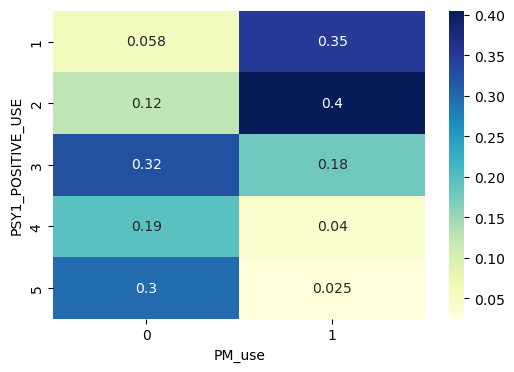

In [10]:
# plot a heatmap
plt.figure(figsize=(6, 4)) 
sns.heatmap(contigency1_pct, annot=True, cmap="YlGnBu")

In [11]:
# Chi-square test of independence:
# chi2: The test statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contigency1) 

# Print all the values
print("chi2 value:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
print("the expected frequencies:", expected)

# interpret p-value
alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 1007.3879509545408
p-value: 8.943633683269309e-217
degree of freedom: 4
the expected frequencies: [[ 528.00252136   41.99747864]
 [ 962.44670122   76.55329878]
 [2076.80991736  165.19008264]
 [1209.77419807   96.22580193]
 [1835.966662    146.033338  ]]
Dependent (reject H0)


In [12]:
# Top1. Political factor and PM use
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Politics factor:', df['PM3_FREQ_POLITICS'].value_counts())
contigency2 = pd.crosstab(df['PM3_FREQ_POLITICS'], df['PM_use']) 
contigency2

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Politics factor: -99    6883
 3      175
 1       45
 2       34
 4        2
Name: PM3_FREQ_POLITICS, dtype: int64


PM_use,0,1
PM3_FREQ_POLITICS,,
-99,6613,270
1,0,45
2,0,34
3,0,175
4,0,2


In [13]:
contigency2_pct = pd.crosstab(df['PM3_FREQ_POLITICS'], df['PM_use'], normalize='columns')
contigency2_pct

PM_use,0,1
PM3_FREQ_POLITICS,,
-99,1.0,0.513308
1,0.0,0.085551
2,0.0,0.064639
3,0.0,0.332700
4,0.0,0.003802


<Axes: xlabel='PM_use', ylabel='PM3_FREQ_POLITICS'>

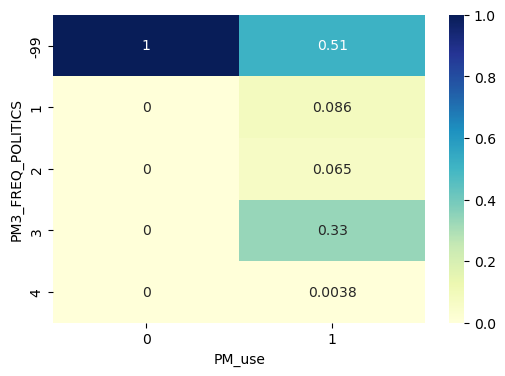

In [14]:
# plot a heatmap
plt.figure(figsize=(6, 4)) 
sns.heatmap(contigency2_pct, annot=True, cmap="YlGnBu")

In [15]:
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(contigency2) 

# Print all the values
print("chi2 value:", chi2_2)
print("p-value:", p_2)
print("degree of freedom:", dof_2)
print("the expected frequencies:", expected_2)

# interpret p-value
alpha = 0.05
if p_2 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 3338.2000266264654
p-value: 0.0
degree of freedom: 4
the expected frequencies: [[6.37586203e+03 5.07137975e+02]
 [4.16844096e+01 3.31559042e+00]
 [3.14948872e+01 2.50511276e+00]
 [1.62106037e+02 1.28939627e+01]
 [1.85264043e+00 1.47359574e-01]]
Dependent (reject H0)


In [16]:
# Top2. Covid factor and PM use
print('PM use value counts before coded:', df['COHORTS'].value_counts())
print('PM use value counts:', df['PM_use'].value_counts())
print('Covid factor:', df['PM2_FREQ_COVID'].value_counts())
contigency3 = pd.crosstab(df['PM2_FREQ_COVID'], df['PM_use']) 
contigency3

PM use value counts before coded:  0.0     6613
-99.0     404
 1.0      122
Name: COHORTS, dtype: int64
PM use value counts: 0    6613
1     526
Name: PM_use, dtype: int64
Covid factor: -99    6883
 3      161
 1       49
 2       44
 4        2
Name: PM2_FREQ_COVID, dtype: int64


PM_use,0,1
PM2_FREQ_COVID,,
-99,6613,270
1,0,49
2,0,44
3,0,161
4,0,2


In [17]:
contigency3_pct = pd.crosstab(df['PM2_FREQ_COVID'], df['PM_use'], normalize='columns')
contigency3_pct

PM_use,0,1
PM2_FREQ_COVID,,
-99,1.0,0.513308
1,0.0,0.093156
2,0.0,0.083650
3,0.0,0.306084
4,0.0,0.003802


<Axes: xlabel='PM_use', ylabel='PM2_FREQ_COVID'>

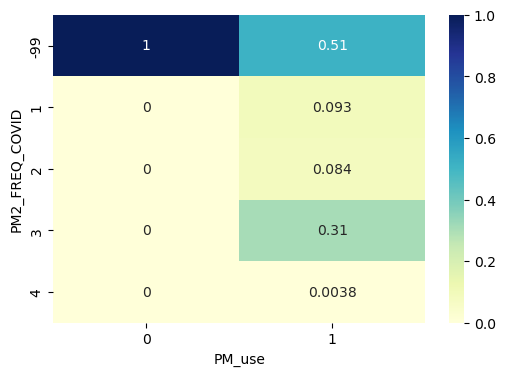

In [18]:
# plot a heatmap
plt.figure(figsize=(6, 4)) 
sns.heatmap(contigency3_pct, annot=True, cmap="YlGnBu")

In [19]:
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(contigency3) 

# Print all the values
print("chi2 value:", chi2_3)
print("p-value:", p_3)
print("degree of freedom:", dof_3)
print("the expected frequencies:", expected_3)

# interpret p-value
alpha = 0.05
if p_3 <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 value: 3338.2000266264654
p-value: 0.0
degree of freedom: 4
the expected frequencies: [[6.37586203e+03 5.07137975e+02]
 [4.53896904e+01 3.61030957e+00]
 [4.07580894e+01 3.24191063e+00]
 [1.49137554e+02 1.18624457e+01]
 [1.85264043e+00 1.47359574e-01]]
Dependent (reject H0)
